TEHTÄVÄ

1. Laske signaalin Fourier-muunnos ja tehospektri. 

2. Piirrä tehospektrin kuvaaja ja määrittele, mikä on tehokkain taajuus. 

3. Ilmaise tulokset selkeästi. Palauta pdf, jossa koodi ja kuvaajat ovat selkeästi näkyvillä. 

Aloitetaan importoimalla tarvittavat kirjastot, lukemalla signaalidata CSV-tiedostosta ja tarkastamalla, että mitä dataa CSV pitää sisällää.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Luetaan signaalidata CSV-tiedostosta
data = pd.read_csv('signaali.csv')
data.head()

,Aika,Signaali
0,0.023641,-0.312650
1,0.031545,-0.273663
2,0.039449,-0.238305
3,0.047353,-0.085638
4,0.055288,-0.172576


Määritellään sarakeet joista luetaan 'Aika' ja 'Signaali' arvot. 

EDIT: Palasin tehtävän pariin, kun tajusin, että ajan ja signaalin avulla voidaan laskea myös näytteenottotaajuus. Joten lasketaan se ensin.

In [2]:
dt = data['Aika'].values #Aika
signal = data['Signaali'].values  #Signaali

# Lasketaan aikaleimojen välinen keskimääräinen aikaero
time_diffs = np.diff(dt)
average_time_diff = np.mean(time_diffs)

# Näytteenottotaajuus on aikaeron käänteisluku
samplerate = 1 / average_time_diff

print(f"Sampling Frequency: {samplerate} Hz")

Sampling Frequency: 126.25439549018698 Hz


Tämän jälkeen suoritetaan Fourier-munnos ja piirretään tehospektri.

/var/data/python/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/var/data/python/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


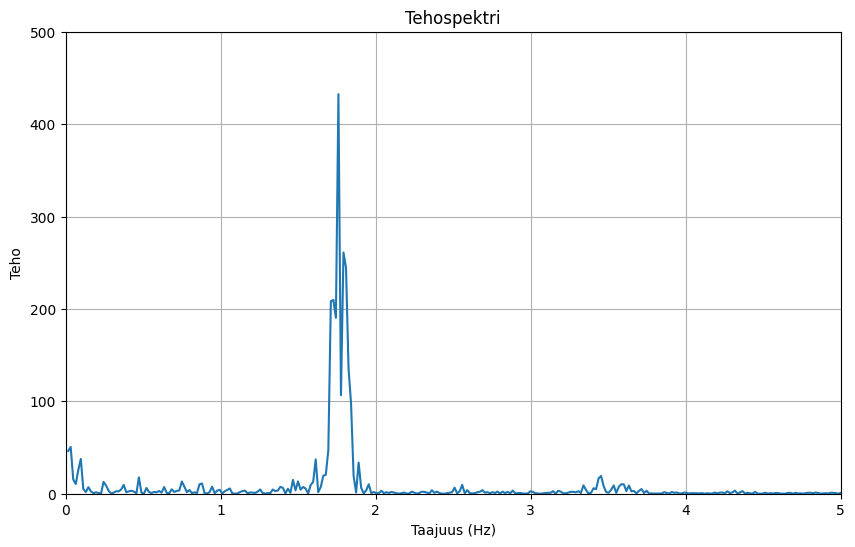

In [3]:


# samplerate = 1000  # Oletetaan, että näytteenottotaajuus on tiedossa, esim. 1000 Hz
# Tämä on kommentoitu pois, koska enää ei tarvitse olettaa vaan voidaan käyttää jo laskettua sampleratea

f = signal - np.mean(signal)  # Poistetaan signaalista keskiarvo
N = len(f)  # Datapisteiden määrä
fourier = np.fft.fft(f)  # Suoritetaan signaalille Fourier-muunnos
psd = fourier*np.conj(fourier)/N   # Tehospektri
freq = np.fft.fftfreq(N, 1 / samplerate)  # Määritetään taajuudet
L = np.arange(1, int(N / 2))  # Rajataan pois nollataajuus ja negatiiviset taajuudet

# Piirretään tehospektrin kuvaaja
plt.figure(figsize=(10, 6))
plt.plot(freq[L], psd[L])  # Piirretään vain positiiviset taajuudet
plt.axis([0, 5, 0, 500]) # Rajataan x- ja y-akselien näkymää
plt.title('Tehospektri')
plt.xlabel('Taajuus (Hz)')
plt.ylabel('Teho')
plt.grid()
plt.show()

Kuvaajasta voidaan jo silmämääräisesti päätellä, että tehokkain taajuus on jossain 1.7Hz paikkeilla, mutta varmistetaan se myös laskennallisesti.

In [4]:
# Määritetään ja lasketaan tehokkain taajuus
maxpower = np.argmax(psd[L])
maxfreq= freq[L][maxpower]
print(f'Tehokkain taajuus: {maxfreq:.2f} Hz') # Tulostetaan ja pyöristetään tehokkain taajuus kahteen desimaaliin

Tehokkain taajuus: 1.76 Hz


Silmämääräinen arvio oli siis suurinpiirtein oikeassa, ja todellinen tehokkain taajuus on 1.76Hz.